In [86]:
# Import Data and format data 
import pandas as pd
import sqlite3 as sl
import numpy as np

df = pd.read_csv('/Users/muraliparthasarathy/Documents/DataMining/DC_Crime_2015_LL.csv');
con = sl.connect('/Users/muraliparthasarathy/Documents/DataMining/dcCrimeDatav1.db');
df.to_sql('dcCrimeDatav3',con,schema='None',if_exists='append',index='true',index_label='None');
dfsql = pd.read_sql('select * from dcCrimeDatav3',con);
dfsql['REPORT_DATE_FORMAT'] =  pd.to_datetime(dfsql['REPORT_DAT'])
#dfsql.info()

In [88]:
# update Reporting Date for day, month, year 
grades = []
for row in dfsql['REPORT_DATE_FORMAT']:
    grades.append(row.month)
dfsql['REPORT_Month'] = grades

grades = []
for row in dfsql['REPORT_DATE_FORMAT']:
    grades.append(row.day)
dfsql['REPORT_Day'] = grades

grades = []
for row in dfsql['REPORT_DATE_FORMAT']:
    grades.append(row.year)
dfsql['REPORT_Year'] = grades

grades = []
for row in dfsql['REPORT_DATE_FORMAT']:
    grades.append(row.hour)
dfsql['REPORT_Hour'] = grades

grades = []
for row in dfsql['REPORT_DATE_FORMAT']:
    grades.append(row.minute)
dfsql['REPORT_MINUTES'] = grades


In [33]:
#dfsql.info()

In [89]:
dfsql['SHIFT'].unique()

array([u'DAY', u'EVENING', u'MIDNIGHT'], dtype=object)

In [90]:
 #Update Shift
shift_num = []
for row in dfsql['SHIFT']:
    if row == 'DAY':
         shift_num.append(1)
    if row == 'EVENING':
         shift_num.append(2)
    if row == 'MIDNIGHT':
         shift_num.append(3)
            
dfsql['SHIFT_NUM'] = shift_num    



In [91]:
dfsql['METHOD'].unique()

array([u'OTHERS', u'GUN', u'KNIFE'], dtype=object)

In [92]:
# Update Method
method_num = []
for row in dfsql['METHOD']:
    if row == 'OTHERS':
         method_num.append(1)
    if row == 'GUN':
         method_num.append(2)
    if row == 'KNIFE':
         method_num.append(3)
            
dfsql['METHOD_NUM'] = method_num 

In [127]:
#update block 
block_num = []
for row in dfsql['BLOCK']:
    block = row[:2]
    if block.isdigit():
        block_num = block
    else:
        block_num = -9
dfsql['BLOCK_NUM'] = block_num

#dfsql['BLOCK_NUM']
    

0         38
1         38
2         38
3         38
4         38
5         38
6         38
7         38
8         38
9         38
10        38
11        38
12        38
13        38
14        38
15        38
16        38
17        38
18        38
19        38
20        38
21        38
22        38
23        38
24        38
25        38
26        38
27        38
28        38
29        38
          ..
255421    38
255422    38
255423    38
255424    38
255425    38
255426    38
255427    38
255428    38
255429    38
255430    38
255431    38
255432    38
255433    38
255434    38
255435    38
255436    38
255437    38
255438    38
255439    38
255440    38
255441    38
255442    38
255443    38
255444    38
255445    38
255446    38
255447    38
255448    38
255449    38
255450    38
Name: BLOCK_NUM, dtype: object

In [93]:
dfsql['ANC'].unique()

array([u'1B', u'1D', u'1A', u'1C', u'6E', u'4C', u'5E', u'2B', u'2D',
       u'2F', u'2C', u'2E', u'2A', u'3C', u'3E', u'3B', u'3D', u'3F',
       u'3G', u'4A', u'4B', u'4D', u'5A', u'5D', u'5C', u'5B', u'6A',
       u'6C', u'6B', u'6D', u'7D', u'7C', u'7E', u'7B', u'7F', u'8A',
       u'8B', u'8C', u'8D', u'8E'], dtype=object)

In [95]:
anc_num = []
for row in dfsql['ANC']:
    sncblocknum = 0
    sncblock = row[1:2]
    if sncblock == 'A' :
        sncblocknum = 1
    if sncblock == 'B' :
        sncblocknum = 2
    if sncblock == 'C' :
        sncblocknum = 3
    if sncblock == 'D' :
        sncblocknum = 4
    if sncblock == 'E' :
        sncblocknum = 5
    if sncblock == 'F' :
        sncblocknum = 6
    if sncblock == 'G' :
        sncblocknum = 7
    anc_num.append(sncblocknum)
dfsql['ANC_NUM'] = anc_num

#dfsql['ANC_NUM']

In [7]:
dfsql['NEIGHBORHOOD_CLUSTER'].unique()


array([u'Cluster 3', u'Cluster 2', u'Cluster 1', u'Cluster 6',
       u'Cluster 18', None, u'Cluster 21', u'Cluster 8', u'Cluster 4',
       u'Cluster 5', u'Cluster 7', u'Cluster 9', u'Cluster 15',
       u'Cluster 14', u'Cluster 11', u'Cluster 13', u'Cluster 12',
       u'Cluster 10', u'Cluster 17', u'Cluster 16', u'Cluster 19',
       u'Cluster 23', u'Cluster 22', u'Cluster 24', u'Cluster 20',
       u'Cluster 25', u'Cluster 26', u'Cluster 27', u'Cluster 33',
       u'Cluster 30', u'Cluster 31', u'Cluster 34', u'Cluster 32',
       u'Cluster 35', u'Cluster 29', u'Cluster 36', u'Cluster 39',
       u'Cluster 37', u'Cluster 38', u'Cluster 28'], dtype=object)

In [19]:
dfsql['NEIGHBORHOOD_CLUSTER'].unique()

array([u'Cluster 3', u'Cluster 2', u'Cluster 1', u'Cluster 6',
       u'Cluster 18', None, u'Cluster 21', u'Cluster 8', u'Cluster 4',
       u'Cluster 5', u'Cluster 7', u'Cluster 9', u'Cluster 15',
       u'Cluster 14', u'Cluster 11', u'Cluster 13', u'Cluster 12',
       u'Cluster 10', u'Cluster 17', u'Cluster 16', u'Cluster 19',
       u'Cluster 23', u'Cluster 22', u'Cluster 24', u'Cluster 20',
       u'Cluster 25', u'Cluster 26', u'Cluster 27', u'Cluster 33',
       u'Cluster 30', u'Cluster 31', u'Cluster 34', u'Cluster 32',
       u'Cluster 35', u'Cluster 29', u'Cluster 36', u'Cluster 39',
       u'Cluster 37', u'Cluster 38', u'Cluster 28'], dtype=object)

In [ ]:
#dfsql['NEIGHBORHOOD_CLUSTER'].isnull()

In [96]:
dfsql['NEIGHBORHOOD_CLUSTER']=dfsql['NEIGHBORHOOD_CLUSTER'].fillna('Cluster 0')

In [97]:
neighborhood_clus = []
for row in dfsql['NEIGHBORHOOD_CLUSTER']:
    str = row.replace('Cluster',' ')
    neighborhood_clus.append(str)
dfsql['NEIGHBORHOOD_CLUSTER_NUM'] = neighborhood_clus

In [98]:
dfsql['VOTING_PRECINCT'] = dfsql['VOTING_PRECINCT'].fillna('Precinct 0')

In [99]:
precint_clus = []
for row in dfsql['VOTING_PRECINCT']:
    str = row.replace('Precinct',' ')
    precint_clus.append(str)
dfsql['VOTING_PRECINCT_NUM'] = precint_clus

In [100]:
dfsql['START_DATE_FORMAT'] =  pd.to_datetime(dfsql['START_DATE'])

In [101]:
dfsql['END_DATE_FORMAT'] =  pd.to_datetime(dfsql['END_DATE'])

In [102]:
dfsql['CRIMETIME_REP'] = dfsql['END_DATE_FORMAT'] - dfsql['START_DATE_FORMAT'] 

In [103]:
dfsql['INVESTIGATION_TIME'] = dfsql['END_DATE_FORMAT'] - dfsql['REPORT_DATE_FORMAT'] 

In [104]:
dfsql['INVESTIGATION_TIME'] = dfsql['REPORT_DATE_FORMAT'] - dfsql['END_DATE_FORMAT'] 

In [105]:
dfsql['INVESTIGATION_TIME'] = dfsql['INVESTIGATION_TIME'].astype('timedelta64[s]')

In [61]:
#dfsql['INVESTIGATION_TIME']

In [100]:
#dfsql['CRIMETIME']

In [101]:
#dfsql.info()

In [102]:
#dfsql['CRIMETIME_REP']

In [103]:
#dfsql['CRIMETIME']

In [106]:
dfsql['CRIMETIME'] = dfsql['CRIMETIME_REP'].astype('timedelta64[s]')

In [104]:
#dfsql['CRIMETIME']

In [105]:
#dfsql.info()

In [106]:
#dfsql['INVESTIGATION_TIME']

In [107]:
#dfsql['INVESTIGATION_TIME']

In [108]:
#dfsql['INVESTIGATION_TIME_MIN']

In [107]:
dfsql.describe()

,true,DISTRICT,PSA,WARD,CENSUS_TRACT,CCN,XBLOCK,YBLOCK,Lat,Long,...,REPORT_Day,REPORT_Year,REPORT_Hour,REPORT_MINUTES,SHIFT_NUM,METHOD_NUM,ANC_NUM,CRIMETIME_REP,INVESTIGATION_TIME,CRIMETIME
count,36493.000000,36446.000000,36445.000000,36493.000000,36379.000000,3.649300e+04,36493.000000,36493.000000,36493.000000,36493.000000,...,36493.000000,36493.0,36493.000000,36493.000000,36493.000000,36493.000000,36493.000000,36241,3.624100e+04,3.624100e+04
mean,18246.000000,3.697196,374.298395,4.421259,6211.275791,1.511937e+07,399301.346694,137698.576414,38.907140,-77.008062,...,15.997342,2015.0,13.350095,28.259721,1.817965,1.123722,3.068671,2 days 02:55:29.244226,1.526626e+05,1.833292e+05
std,10534.766023,1.947438,194.524001,2.339270,3146.217537,1.087825e+05,3113.115343,3424.503748,0.030848,0.035894,...,8.703391,0.0,6.229953,17.769631,0.727352,0.415183,1.536272,51 days 12:43:52.792877,3.740308e+06,4.452233e+06
min,0.000000,1.000000,101.000000,1.000000,100.000000,6.155556e+06,390147.000000,127300.000000,38.813470,-77.113640,...,1.000000,2015.0,0.000000,0.000000,1.000000,1.000000,1.000000,-1 days +02:30:00,-8.031300e+06,-7.740000e+04
25%,9123.000000,NaN,NaN,2.000000,NaN,1.505885e+07,397228.000000,136027.000000,38.892080,-77.031960,...,9.000000,2015.0,9.000000,13.000000,1.000000,1.000000,2.000000,0 days 00:06:00,NaN,NaN
50%,18246.000000,NaN,NaN,5.000000,NaN,1.511063e+07,398878.000000,137622.530000,38.906460,-77.012930,...,16.000000,2015.0,14.000000,29.000000,2.000000,1.000000,3.000000,0 days 00:51:00,NaN,NaN
75%,27369.000000,NaN,NaN,6.000000,NaN,1.516497e+07,401257.000000,139839.000000,38.926420,-76.985510,...,23.000000,2015.0,18.000000,44.000000,2.000000,1.000000,4.000000,0 days 07:00:00,NaN,NaN
max,36492.000000,7.000000,708.000000,8.000000,11100.000000,1.619697e+07,407806.000000,147292.000000,38.993560,-76.910020,...,31.000000,2015.0,23.000000,59.000000,3.000000,3.000000,7.000000,5478 days 10:00:00,5.517361e+08,4.733352e+08


In [108]:
dfsql['DISTRICT']=dfsql['DISTRICT'].fillna(0)

In [109]:
dfsql['PSA']=dfsql['PSA'].fillna(194)

In [110]:
dfsql['WARD']=dfsql['WARD'].fillna(1)

In [111]:
dfsql['CENSUS_TRACT'] = dfsql['CENSUS_TRACT'].fillna(6211)

In [112]:
dfsql['INVESTIGATION_TIME'] = dfsql['INVESTIGATION_TIME'].fillna(0)

In [113]:
dfsql.describe()

,true,DISTRICT,PSA,WARD,CENSUS_TRACT,CCN,XBLOCK,YBLOCK,Lat,Long,...,REPORT_Day,REPORT_Year,REPORT_Hour,REPORT_MINUTES,SHIFT_NUM,METHOD_NUM,ANC_NUM,CRIMETIME_REP,INVESTIGATION_TIME,CRIMETIME
count,36493.000000,36493.000000,36493.000000,36493.000000,36493.000000,3.649300e+04,36493.000000,36493.000000,36493.000000,36493.000000,...,36493.000000,36493.0,36493.000000,36493.000000,36493.000000,36493.000000,36493.000000,36241,3.649300e+04,3.624100e+04
mean,18246.000000,3.692434,374.061245,4.421259,6211.274929,1.511937e+07,399301.346694,137698.576414,38.907140,-77.008062,...,15.997342,2015.0,13.350095,28.259721,1.817965,1.123722,3.068671,2 days 02:55:29.244226,1.516084e+05,1.833292e+05
std,10534.766023,1.950696,194.505828,2.339270,3141.299344,1.087825e+05,3113.115343,3424.503748,0.030848,0.035894,...,8.703391,0.0,6.229953,17.769631,0.727352,0.415183,1.536272,51 days 12:43:52.792877,3.727392e+06,4.452233e+06
min,0.000000,0.000000,101.000000,1.000000,100.000000,6.155556e+06,390147.000000,127300.000000,38.813470,-77.113640,...,1.000000,2015.0,0.000000,0.000000,1.000000,1.000000,1.000000,-1 days +02:30:00,-8.031300e+06,-7.740000e+04
25%,9123.000000,2.000000,206.000000,2.000000,3500.000000,1.505885e+07,397228.000000,136027.000000,38.892080,-77.031960,...,9.000000,2015.0,9.000000,13.000000,1.000000,1.000000,2.000000,0 days 00:06:00,9.000000e+02,NaN
50%,18246.000000,4.000000,401.000000,5.000000,7000.000000,1.511063e+07,398878.000000,137622.530000,38.906460,-77.012930,...,16.000000,2015.0,14.000000,29.000000,2.000000,1.000000,3.000000,0 days 00:51:00,3.900000e+03,NaN
75%,27369.000000,5.000000,506.000000,6.000000,8904.000000,1.516497e+07,401257.000000,139839.000000,38.926420,-76.985510,...,23.000000,2015.0,18.000000,44.000000,2.000000,1.000000,4.000000,0 days 07:00:00,1.212000e+04,NaN
max,36492.000000,7.000000,708.000000,8.000000,11100.000000,1.619697e+07,407806.000000,147292.000000,38.993560,-76.910020,...,31.000000,2015.0,23.000000,59.000000,3.000000,3.000000,7.000000,5478 days 10:00:00,5.517361e+08,4.733352e+08


In [117]:
dfsql.describe()

,true,DISTRICT,PSA,WARD,CENSUS_TRACT,CCN,XBLOCK,YBLOCK,Lat,Long,CRIMETIME,INVESTIGATION_TIME,CRIMETIME_REP,INVESTIGATION_TIME_MIN,SHIFT_NUM
count,255451.000000,255451.000000,255451.000000,255451.000000,255451.000000,2.554510e+05,255451.000000,255451.000000,255451.000000,255451.000000,2.536870e+05,255451,253687,2.536870e+05,255451.000000
mean,18246.000000,3.692434,374.061245,4.421259,6211.274929,1.511937e+07,399301.346694,137698.576414,38.907140,-77.008062,1.833292e+05,1 days 18:06:48.379141,2 days 02:55:29.244226,1.526626e+05,1.817965
std,10534.642303,1.950673,194.503544,2.339243,3141.262453,1.087812e+05,3113.078782,3424.463530,0.030848,0.035893,4.452180e+06,43 days 03:22:28.288025,51 days 12:43:00.142051,3.740263e+06,0.727343
min,0.000000,0.000000,101.000000,1.000000,100.000000,6.155556e+06,390147.000000,127300.000000,38.813470,-77.113640,-7.740000e+04,-93 days +01:05:00,-1 days +02:30:00,-8.031300e+06,1.000000
25%,9123.000000,2.000000,206.000000,2.000000,3500.000000,1.505885e+07,397228.000000,136027.000000,38.892080,-77.031960,NaN,0 days 00:15:00,0 days 00:06:00,NaN,1.000000
50%,18246.000000,4.000000,401.000000,5.000000,7000.000000,1.511063e+07,398878.000000,137622.530000,38.906460,-77.012930,NaN,0 days 01:05:00,0 days 00:51:00,NaN,2.000000
75%,27369.000000,5.000000,506.000000,6.000000,8904.000000,1.516497e+07,401257.000000,139839.000000,38.926420,-76.985510,NaN,0 days 03:22:00,0 days 07:00:00,NaN,2.000000
max,36492.000000,7.000000,708.000000,8.000000,11100.000000,1.619697e+07,407806.000000,147292.000000,38.993560,-76.910020,4.733352e+08,6385 days 20:01:00,5478 days 10:00:00,5.517361e+08,3.000000


In [118]:
dfsql['CRIMETIME'].isnull()

0         False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29        False
          ...  
255421    False
255422    False
255423    False
255424    False
255425    False
255426    False
255427    False
255428    False
255429    False
255430    False
255431    False
255432    False
255433    False
255434    False
255435    False
255436    False
255437    False
255438     True
255439    False
255440    False
255441    False
255442    False
255443    False
255444    False
255445    False
255446    False
255447    False
255448    False
255449    False
255450    False
Name: CRIMETIME, dtype: 

In [114]:
dfsql['CRIMETIME'] = dfsql['CRIMETIME'].fillna(10)

In [71]:
dfsql.describe()

,true,DISTRICT,PSA,WARD,CENSUS_TRACT,CCN,XBLOCK,YBLOCK,Lat,Long,...,REPORT_Day,REPORT_Year,REPORT_Hour,REPORT_MINUTES,SHIFT_NUM,METHOD_NUM,ANC_NUM,CRIMETIME_REP,INVESTIGATION_TIME,CRIMETIME
count,36493.000000,36493.000000,36493.000000,36493.000000,36493.000000,3.649300e+04,36493.000000,36493.000000,36493.000000,36493.000000,...,36493.000000,36493.0,36493.000000,36493.000000,36493.000000,36493.000000,36493.000000,36241,3.649300e+04,3.649300e+04
mean,18246.000000,3.692434,374.061245,4.421259,6211.274929,1.511937e+07,399301.346694,137698.576414,38.907140,-77.008062,...,15.997342,2015.0,13.350095,28.259721,1.817965,1.123722,3.068671,2 days 02:55:29.244226,1.516084e+05,1.820633e+05
std,10534.766023,1.950696,194.505828,2.339270,3141.299344,1.087825e+05,3113.115343,3424.503748,0.030848,0.035894,...,8.703391,0.0,6.229953,17.769631,0.727352,0.415183,1.536272,51 days 12:43:52.792877,3.727392e+06,4.436859e+06
min,0.000000,0.000000,101.000000,1.000000,100.000000,6.155556e+06,390147.000000,127300.000000,38.813470,-77.113640,...,1.000000,2015.0,0.000000,0.000000,1.000000,1.000000,1.000000,-1 days +02:30:00,-8.031300e+06,-7.740000e+04
25%,9123.000000,2.000000,206.000000,2.000000,3500.000000,1.505885e+07,397228.000000,136027.000000,38.892080,-77.031960,...,9.000000,2015.0,9.000000,13.000000,1.000000,1.000000,2.000000,0 days 00:06:00,9.000000e+02,3.600000e+02
50%,18246.000000,4.000000,401.000000,5.000000,7000.000000,1.511063e+07,398878.000000,137622.530000,38.906460,-77.012930,...,16.000000,2015.0,14.000000,29.000000,2.000000,1.000000,3.000000,0 days 00:51:00,3.900000e+03,3.000000e+03
75%,27369.000000,5.000000,506.000000,6.000000,8904.000000,1.516497e+07,401257.000000,139839.000000,38.926420,-76.985510,...,23.000000,2015.0,18.000000,44.000000,2.000000,1.000000,4.000000,0 days 07:00:00,1.212000e+04,2.520000e+04
max,36492.000000,7.000000,708.000000,8.000000,11100.000000,1.619697e+07,407806.000000,147292.000000,38.993560,-76.910020,...,31.000000,2015.0,23.000000,59.000000,3.000000,3.000000,7.000000,5478 days 10:00:00,5.517361e+08,4.733352e+08


In [122]:
dfsql.describe()

,true,DISTRICT,PSA,WARD,CENSUS_TRACT,CCN,XBLOCK,YBLOCK,Lat,Long,CRIMETIME,INVESTIGATION_TIME,CRIMETIME_REP,INVESTIGATION_TIME_MIN,SHIFT_NUM
count,255451.000000,255451.000000,255451.000000,255451.000000,255451.000000,2.554510e+05,255451.000000,255451.000000,255451.000000,255451.000000,2.554510e+05,255451,253687,2.554510e+05,255451.000000
mean,18246.000000,3.692434,374.061245,4.421259,6211.274929,1.511937e+07,399301.346694,137698.576414,38.907140,-77.008062,1.820633e+05,1 days 18:06:48.379141,2 days 02:55:29.244226,1.516084e+05,1.817965
std,10534.642303,1.950673,194.503544,2.339243,3141.262453,1.087812e+05,3113.078782,3424.463530,0.030848,0.035893,4.436807e+06,43 days 03:22:28.288025,51 days 12:43:00.142051,3.727348e+06,0.727343
min,0.000000,0.000000,101.000000,1.000000,100.000000,6.155556e+06,390147.000000,127300.000000,38.813470,-77.113640,-7.740000e+04,-93 days +01:05:00,-1 days +02:30:00,-8.031300e+06,1.000000
25%,9123.000000,2.000000,206.000000,2.000000,3500.000000,1.505885e+07,397228.000000,136027.000000,38.892080,-77.031960,3.600000e+02,0 days 00:15:00,0 days 00:06:00,9.000000e+02,1.000000
50%,18246.000000,4.000000,401.000000,5.000000,7000.000000,1.511063e+07,398878.000000,137622.530000,38.906460,-77.012930,3.000000e+03,0 days 01:05:00,0 days 00:51:00,3.900000e+03,2.000000
75%,27369.000000,5.000000,506.000000,6.000000,8904.000000,1.516497e+07,401257.000000,139839.000000,38.926420,-76.985510,2.520000e+04,0 days 03:22:00,0 days 07:00:00,1.212000e+04,2.000000
max,36492.000000,7.000000,708.000000,8.000000,11100.000000,1.619697e+07,407806.000000,147292.000000,38.993560,-76.910020,4.733352e+08,6385 days 20:01:00,5478 days 10:00:00,5.517361e+08,3.000000


In [115]:
dfsql.to_csv('/Users/muraliparthasarathy/Documents/DataMining/lab1/MSDS7331_Project_DC/data/MuraliDataClean.csv')

In [134]:
dfsql.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255451 entries, 0 to 255450
Data columns (total 33 columns):
true                        255451 non-null int64
REPORT_DAT                  255451 non-null object
SHIFT                       255451 non-null object
OFFENSE                     255451 non-null object
METHOD                      255451 non-null object
BLOCK                       255451 non-null object
DISTRICT                    255451 non-null float64
PSA                         255451 non-null float64
WARD                        255451 non-null int64
ANC                         255451 non-null object
NEIGHBORHOOD_CLUSTER        255451 non-null object
BLOCK_GROUP                 254653 non-null object
CENSUS_TRACT                255451 non-null float64
VOTING_PRECINCT             255451 non-null object
CCN                         255451 non-null int64
XBLOCK                      255451 non-null float64
YBLOCK                      255451 non-null float64
START_DATE          

In [116]:
dfsql.describe()

,true,DISTRICT,PSA,WARD,CENSUS_TRACT,CCN,XBLOCK,YBLOCK,Lat,Long,...,REPORT_Day,REPORT_Year,REPORT_Hour,REPORT_MINUTES,SHIFT_NUM,METHOD_NUM,ANC_NUM,CRIMETIME_REP,INVESTIGATION_TIME,CRIMETIME
count,36493.000000,36493.000000,36493.000000,36493.000000,36493.000000,3.649300e+04,36493.000000,36493.000000,36493.000000,36493.000000,...,36493.000000,36493.0,36493.000000,36493.000000,36493.000000,36493.000000,36493.000000,36241,3.649300e+04,3.649300e+04
mean,18246.000000,3.692434,374.061245,4.421259,6211.274929,1.511937e+07,399301.346694,137698.576414,38.907140,-77.008062,...,15.997342,2015.0,13.350095,28.259721,1.817965,1.123722,3.068671,2 days 02:55:29.244226,1.516084e+05,1.820633e+05
std,10534.766023,1.950696,194.505828,2.339270,3141.299344,1.087825e+05,3113.115343,3424.503748,0.030848,0.035894,...,8.703391,0.0,6.229953,17.769631,0.727352,0.415183,1.536272,51 days 12:43:52.792877,3.727392e+06,4.436859e+06
min,0.000000,0.000000,101.000000,1.000000,100.000000,6.155556e+06,390147.000000,127300.000000,38.813470,-77.113640,...,1.000000,2015.0,0.000000,0.000000,1.000000,1.000000,1.000000,-1 days +02:30:00,-8.031300e+06,-7.740000e+04
25%,9123.000000,2.000000,206.000000,2.000000,3500.000000,1.505885e+07,397228.000000,136027.000000,38.892080,-77.031960,...,9.000000,2015.0,9.000000,13.000000,1.000000,1.000000,2.000000,0 days 00:06:00,9.000000e+02,3.600000e+02
50%,18246.000000,4.000000,401.000000,5.000000,7000.000000,1.511063e+07,398878.000000,137622.530000,38.906460,-77.012930,...,16.000000,2015.0,14.000000,29.000000,2.000000,1.000000,3.000000,0 days 00:51:00,3.900000e+03,3.000000e+03
75%,27369.000000,5.000000,506.000000,6.000000,8904.000000,1.516497e+07,401257.000000,139839.000000,38.926420,-76.985510,...,23.000000,2015.0,18.000000,44.000000,2.000000,1.000000,4.000000,0 days 07:00:00,1.212000e+04,2.520000e+04
max,36492.000000,7.000000,708.000000,8.000000,11100.000000,1.619697e+07,407806.000000,147292.000000,38.993560,-76.910020,...,31.000000,2015.0,23.000000,59.000000,3.000000,3.000000,7.000000,5478 days 10:00:00,5.517361e+08,4.733352e+08


In [137]:
dfsql.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255451 entries, 0 to 255450
Data columns (total 33 columns):
true                        255451 non-null int64
REPORT_DAT                  255451 non-null object
SHIFT                       255451 non-null object
OFFENSE                     255451 non-null object
METHOD                      255451 non-null object
BLOCK                       255451 non-null object
DISTRICT                    255451 non-null float64
PSA                         255451 non-null float64
WARD                        255451 non-null int64
ANC                         255451 non-null object
NEIGHBORHOOD_CLUSTER        255451 non-null object
BLOCK_GROUP                 254653 non-null object
CENSUS_TRACT                255451 non-null float64
VOTING_PRECINCT             255451 non-null object
CCN                         255451 non-null int64
XBLOCK                      255451 non-null float64
YBLOCK                      255451 non-null float64
START_DATE          

In [117]:
dfsql['NEIGHBORHOOD_CLUSTER_NUM']

0           3
1           2
2           2
3           3
4           2
5           3
6           2
7           2
8           3
9           2
10          2
11          3
12          2
13          1
14          2
15          1
16          2
17          1
18          2
19          3
20          2
21          2
22          2
23          3
24          2
25          1
26          1
27          2
28          2
29          2
         ... 
36463      39
36464      37
36465      39
36466      39
36467      39
36468      37
36469      38
36470      34
36471      37
36472      28
36473      37
36474      37
36475      28
36476      39
36477      37
36478      39
36479      38
36480      37
36481      39
36482      38
36483      34
36484      37
36485      39
36486      36
36487       0
36488      36
36489      36
36490      38
36491       0
36492      39
Name: NEIGHBORHOOD_CLUSTER_NUM, dtype: object

In [118]:
dfsql.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36493 entries, 0 to 36492
Data columns (total 37 columns):
true                        36493 non-null int64
REPORT_DAT                  36493 non-null object
SHIFT                       36493 non-null object
OFFENSE                     36493 non-null object
METHOD                      36493 non-null object
BLOCK                       36493 non-null object
DISTRICT                    36493 non-null float64
PSA                         36493 non-null float64
WARD                        36493 non-null int64
ANC                         36493 non-null object
NEIGHBORHOOD_CLUSTER        36493 non-null object
BLOCK_GROUP                 36379 non-null object
CENSUS_TRACT                36493 non-null float64
VOTING_PRECINCT             36493 non-null object
CCN                         36493 non-null int64
XBLOCK                      36493 non-null float64
YBLOCK                      36493 non-null float64
START_DATE                  36493 non-n

In [119]:
dfsql['VOTING_PRECINCT_NUM'] = dfsql['VOTING_PRECINCT_NUM'].astype('float64', raise_on_error = False)

In [120]:
dfsql['NEIGHBORHOOD_CLUSTER_NUM'] = dfsql['NEIGHBORHOOD_CLUSTER_NUM'].astype('float64', raise_on_error = False)

In [121]:
dfsql.describe()

,true,DISTRICT,PSA,WARD,CENSUS_TRACT,CCN,XBLOCK,YBLOCK,Lat,Long,...,REPORT_Hour,REPORT_MINUTES,SHIFT_NUM,METHOD_NUM,ANC_NUM,NEIGHBORHOOD_CLUSTER_NUM,VOTING_PRECINCT_NUM,CRIMETIME_REP,INVESTIGATION_TIME,CRIMETIME
count,36493.000000,36493.000000,36493.000000,36493.000000,36493.000000,3.649300e+04,36493.000000,36493.000000,36493.000000,36493.000000,...,36493.000000,36493.000000,36493.000000,36493.000000,36493.000000,36493.000000,36493.000000,36241,3.649300e+04,3.649300e+04
mean,18246.000000,3.692434,374.061245,4.421259,6211.274929,1.511937e+07,399301.346694,137698.576414,38.907140,-77.008062,...,13.350095,28.259721,1.817965,1.123722,3.068671,17.584331,70.066479,2 days 02:55:29.244226,1.516084e+05,1.820633e+05
std,10534.766023,1.950696,194.505828,2.339270,3141.299344,1.087825e+05,3113.115343,3424.503748,0.030848,0.035894,...,6.229953,17.769631,0.727352,0.415183,1.536272,11.862492,41.974983,51 days 12:43:52.792877,3.727392e+06,4.436859e+06
min,0.000000,0.000000,101.000000,1.000000,100.000000,6.155556e+06,390147.000000,127300.000000,38.813470,-77.113640,...,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-1 days +02:30:00,-8.031300e+06,-7.740000e+04
25%,9123.000000,2.000000,206.000000,2.000000,3500.000000,1.505885e+07,397228.000000,136027.000000,38.892080,-77.031960,...,9.000000,13.000000,1.000000,1.000000,2.000000,6.000000,33.000000,0 days 00:06:00,9.000000e+02,3.600000e+02
50%,18246.000000,4.000000,401.000000,5.000000,7000.000000,1.511063e+07,398878.000000,137622.530000,38.906460,-77.012930,...,14.000000,29.000000,2.000000,1.000000,3.000000,18.000000,72.000000,0 days 00:51:00,3.900000e+03,3.000000e+03
75%,27369.000000,5.000000,506.000000,6.000000,8904.000000,1.516497e+07,401257.000000,139839.000000,38.926420,-76.985510,...,18.000000,44.000000,2.000000,1.000000,4.000000,26.000000,106.000000,0 days 07:00:00,1.212000e+04,2.520000e+04
max,36492.000000,7.000000,708.000000,8.000000,11100.000000,1.619697e+07,407806.000000,147292.000000,38.993560,-76.910020,...,23.000000,59.000000,3.000000,3.000000,7.000000,39.000000,143.000000,5478 days 10:00:00,5.517361e+08,4.733352e+08


In [122]:
dfsql.to_csv('/Users/muraliparthasarathy/Documents/DataMining/lab1/MSDS7331_Project_DC/data/MuraliDataClean.csv')

In [124]:
con = sl.connect('/Users/muraliparthasarathy/Documents/DataMining/dcCrimeDatacleanedv2.db');
dfsql.to_sql('dcCrimeDatacleanv4',con);

In [82]:
import seaborn as sns
sns.set_style("whitegrid")


In [125]:
dfsql.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36493 entries, 0 to 36492
Data columns (total 37 columns):
true                        36493 non-null int64
REPORT_DAT                  36493 non-null object
SHIFT                       36493 non-null object
OFFENSE                     36493 non-null object
METHOD                      36493 non-null object
BLOCK                       36493 non-null object
DISTRICT                    36493 non-null float64
PSA                         36493 non-null float64
WARD                        36493 non-null int64
ANC                         36493 non-null object
NEIGHBORHOOD_CLUSTER        36493 non-null object
BLOCK_GROUP                 36379 non-null object
CENSUS_TRACT                36493 non-null float64
VOTING_PRECINCT             36493 non-null object
CCN                         36493 non-null int64
XBLOCK                      36493 non-null float64
YBLOCK                      36493 non-null float64
START_DATE                  36493 non-n

In [131]:
dfMonthReport = dfsql.groupby('REPORT_Month').count()

In [132]:
dfMonthReport.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 1 to 12
Data columns (total 36 columns):
true                        12 non-null int64
REPORT_DAT                  12 non-null int64
SHIFT                       12 non-null int64
OFFENSE                     12 non-null int64
METHOD                      12 non-null int64
BLOCK                       12 non-null int64
DISTRICT                    12 non-null int64
PSA                         12 non-null int64
WARD                        12 non-null int64
ANC                         12 non-null int64
NEIGHBORHOOD_CLUSTER        12 non-null int64
BLOCK_GROUP                 12 non-null int64
CENSUS_TRACT                12 non-null int64
VOTING_PRECINCT             12 non-null int64
CCN                         12 non-null int64
XBLOCK                      12 non-null int64
YBLOCK                      12 non-null int64
START_DATE                  12 non-null int64
END_DATE                    12 non-null int64
Lat                    

In [136]:
con = sl.connect('/Users/muraliparthasarathy/Documents/DataMining/dcCrimeDatav1.db');
dfMonth = pd.read_sql('select Report_Month, count(*)  from dcCrimeDatav3 Group by Report_Month',con);


DatabaseError: Execution failed on sql 'select Report_Month, count(*)  from dcCrimeDatav3 Group by Report_Month': no such column: Report_Month

In [139]:
dfMonth = dfsql.groupby( [ "REPORT_Month"] ).size().to_frame(name = 'count').reset_index()

In [140]:
dfMonth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
REPORT_Month    12 non-null int64
count           12 non-null int64
dtypes: int64(2)
memory usage: 264.0 bytes


In [151]:
import plotly.plotly as py
import plotly.graph_objs as go
import numpy as np
from plotly.graph_objs import Bar, Scatter, Figure, Layout
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot


In [161]:
import plotly 
plotly.tools.set_credentials_file(username='cnpsap', api_key='nbs9yo1y2j')

N = 40
x = np.linspace(0, 1, N)
y = np.random.randn(N)
df = pd.DataFrame({'x': x, 'y': y})
df.head()

data = [
    go.Bar(
        x=dfMonth['REPORT_Month'], # assign x as the dataframe column 'x'
        y=dfMonth['count']
    )
]

layout = Layout(title=' Crimes by Month')
fig = Figure(data=data,layout=layout)
py.image.save_as(fig, 'my_plot.png')
#py.image.save_as({'data' : data },'my_plot.png')



In [157]:
print __version__


1.12.9


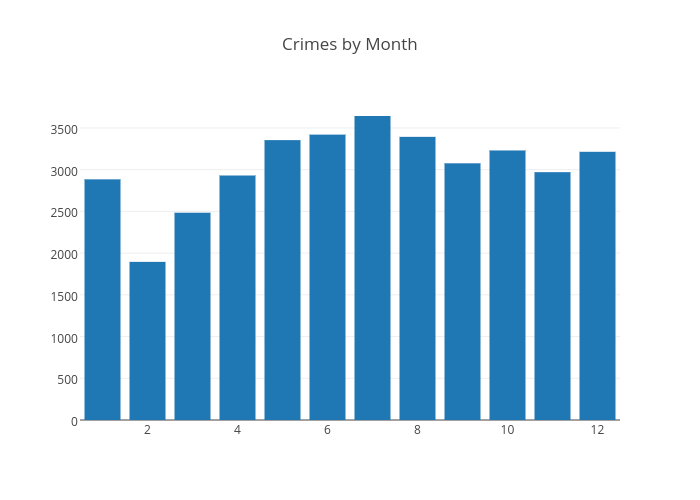

In [162]:

from IPython.display import Image
Image(filename='my_plot.png') 

In [188]:
dfMonthOffense = dfsql.groupby( [ "REPORT_Month","OFFENSE_NUM"] ).size().to_frame(name = 'count').reset_index()

#rpt.query('STK_ID in (600809,600141,600329)')
#rpt[rpt['STK_ID']=='600809']

dfOffese1 = dfMonthOffense[dfMonthOffense['OFFENSE_NUM'] == 1]
dfOffese1 = dfOffese1.groupby( [ "REPORT_Month","OFFENSE_NUM"] ).size().to_frame(name = 'count').reset_index()

dfOffese2 = dfMonthOffense[dfMonthOffense['OFFENSE_NUM'] == 2]
dfOffese2 = dfOffese2.groupby( [ "REPORT_Month","OFFENSE_NUM"] ).size().to_frame(name = 'count').reset_index()


dfOffese3 = dfMonthOffense[dfMonthOffense['OFFENSE_NUM'] == 3]
dfOffese3 = dfOffese3.groupby( [ "REPORT_Month","OFFENSE_NUM"] ).size().to_frame(name = 'count').reset_index()


dfOffese4 = dfMonthOffense[dfMonthOffense['OFFENSE_NUM'] == 4]

dfOffese4 = dfOffese4.groupby( [ "REPORT_Month","OFFENSE_NUM"] ).size().to_frame(name = 'count').reset_index()


dfOffese5 = dfMonthOffense[dfMonthOffense['OFFENSE_NUM'] == 5]
dfOffese5 = dfOffese5.groupby( [ "REPORT_Month","OFFENSE_NUM"] ).size().to_frame(name = 'count').reset_index()


dfOffese6 = dfMonthOffense[dfMonthOffense['OFFENSE_NUM'] == 6]
dfOffese6 = dfOffese6.groupby( [ "REPORT_Month","OFFENSE_NUM"] ).size().to_frame(name = 'count').reset_index()


dfOffese7 = dfMonthOffense[dfMonthOffense['OFFENSE_NUM'] == 7]
dfOffese7 = dfOffese7.groupby( [ "REPORT_Month","OFFENSE_NUM"] ).size().to_frame(name = 'count').reset_index()


dfOffese8 = dfMonthOffense[dfMonthOffense['OFFENSE_NUM'] == 8]
dfOffese8 = dfOffese8.groupby( [ "REPORT_Month","OFFENSE_NUM"] ).size().to_frame(name = 'count').reset_index()


dfOffese9 = dfMonthOffense[dfMonthOffense['OFFENSE_NUM'] == 9]
dfOffese9 = dfOffese9.groupby( [ "REPORT_Month","OFFENSE_NUM"] ).size().to_frame(name = 'count').reset_index()




#dfMonthOffense['OFFENSE_NUM']dfOffese1 = dfMonthOffense[dfMonthOffense['OFFENSE_NUM'] == 1]


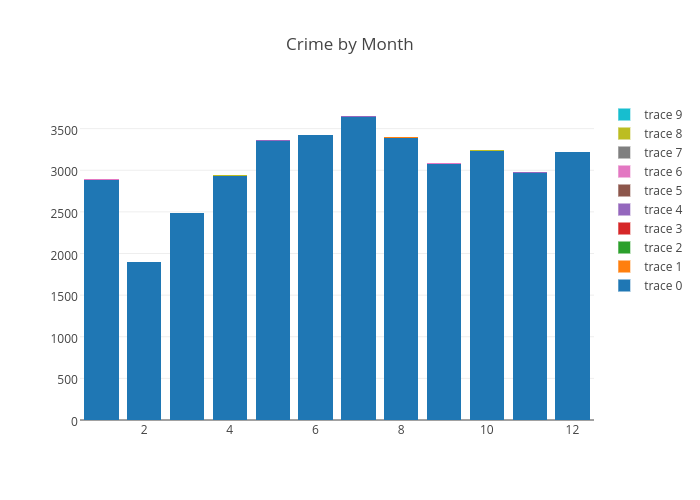

In [204]:
# Find your api_key here: https://plot.ly/settings/api
import plotly 
plotly.tools.set_credentials_file(username='cnpsap', api_key='nbs9yo1y2j')
import plotly.plotly as py
import plotly.graph_objs as go

import pandas as pd
import numpy as np

N = 20
x = np.linspace(1, 10, N)
y = np.random.randn(N)+3
y2 = np.random.randn(N)+6
y3 = np.random.randn(N)+9
y4 = np.random.randn(N)+12
y5 = np.random.randn(N)+15
y6 = np.random.randn(N)+18
y7 = np.random.randn(N)+21
y8 = np.random.randn(N)+24
y9 = np.random.randn(N)+27
df = pd.DataFrame({'x': x, 'y': y, 'y2':y2, 'y3':y3, 'y4':y4,'y5': y5,'y6': y6,'y7': y7,'y8': y8,'y9': y9})
df.head()

data = [
    go.Bar(
        x=dfMonth['REPORT_Month'], # assign x as the dataframe column 'x'
        y=dfMonth['count']
    ),
    go.Bar(
        x=dfOffese1['REPORT_Month'],
        y=dfOffese1['count']
    ) ,
    go.Bar(
        x=dfOffese2['REPORT_Month'],
        y=dfOffese2['count']
    ),
    go.Bar(
        x=dfOffese3['REPORT_Month'],
        y=dfOffese3['count']
    ),
    go.Bar(
        x=dfOffese4['REPORT_Month'],
        y=dfOffese4['count']
    ),
    go.Bar(
        x=dfOffese5['REPORT_Month'],
        y=dfOffese5['count']
    ),
    go.Bar(
        x=dfOffese6['REPORT_Month'],
        y=dfOffese6['count']
    ),
    go.Bar(
        x=dfOffese7['REPORT_Month'],
        y=dfOffese7['count']
    ),
    go.Bar(
        x=dfOffese8['REPORT_Month'],
        y=dfOffese8['count']
    ),
    go.Bar(
        x=dfOffese9['REPORT_Month'],
        y=dfOffese9['count']
    )
]

layout = go.Layout(
    barmode='stack',
    title='Crime by Month'
)

fig = go.Figure(data=data, layout=layout)
py.image.save_as(fig, 'my_stack_plot.png')

from IPython.display import Image
Image(filename='my_stack_plot.png')

# IPython notebook
# py.iplot(fig, filename='pandas-bar-chart-layout')

#url = py.plot(data, filename='pandas-bar-chart-layout')